In [ ]:
#This week's assignment will involve me going through the tutorial file and completing the assignments
#Where it is specified in the document. Each assignment section will be clearly started and ended
#With comments 'ASSIGNMENT START' and 'ASSIGNMENT END', respectively.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
from datetime import date
from sklearn.model_selection import train_test_split

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

import os
#os.chdir("/content/drive/")
os.chdir("/content/drive/My Drive")
!ls

 churn-bigml-20.csv	       heart.csv
 climate_2009_2016.csv	       IRIS.csv
'Colab Notebooks'	      'Loan Prediction.csv'
 Cuisine_rating.csv	       Mall_Customers.csv
 Diabetes-Classification.csv   twitter_training.csv
 fitness_class_2212.csv        weather_data_extended.csv


In [ ]:
clim = pd.read_csv('climate_2009_2016.csv', index_col = 0)

In [ ]:
clim = clim.reset_index()
clim.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

In [ ]:
df = clim[['Date Time', 'T (degC)']].rename(columns = {'T (degC)': 'T', 'Date Time': 'datetime'})
df.head()

datetime     T
0  01.01.2009 00:10:00 -8.02
1  01.01.2009 00:20:00 -8.41
2  01.01.2009 00:30:00 -8.51
3  01.01.2009 00:40:00 -8.31
4  01.01.2009 00:50:00 -8.27

<Axes: >

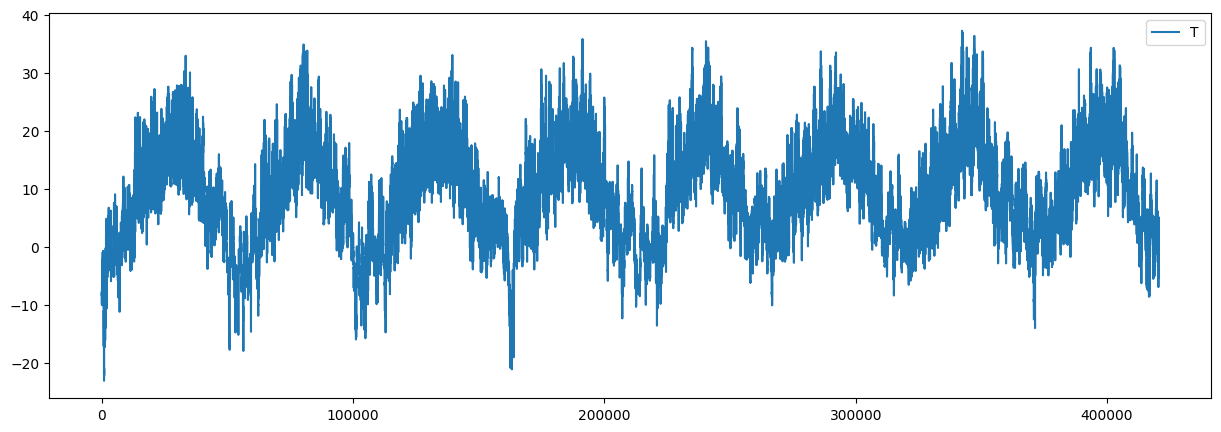

In [ ]:
df.plot(figsize = (15, 5))

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format = '%d.%m.%Y %H:%M:%S')

In [ ]:
type(df['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.head(10)

datetime     T
0 2009-01-01 00:10:00 -8.02
1 2009-01-01 00:20:00 -8.41
2 2009-01-01 00:30:00 -8.51
3 2009-01-01 00:40:00 -8.31
4 2009-01-01 00:50:00 -8.27
5 2009-01-01 01:00:00 -8.05
6 2009-01-01 01:10:00 -7.62
7 2009-01-01 01:20:00 -7.62
8 2009-01-01 01:30:00 -7.91
9 2009-01-01 01:40:00 -8.43

In [ ]:
#Taking each 6th record as we need hourly data, so we can ignore every other round (which are on 10 min level)
#We can also take mean/median of each consecutive 6 records if that is a business requirement, but right now it is not
df_hour_lvl = df[5::6].reset_index().drop('index', axis = 1)

df_hour_lvl.shape

(70091, 2)

In [ ]:
df_hour_lvl.head()

datetime     T
0 2009-01-01 01:00:00 -8.05
1 2009-01-01 02:00:00 -8.88
2 2009-01-01 03:00:00 -8.81
3 2009-01-01 04:00:00 -9.05
4 2009-01-01 05:00:00 -9.63

/tmp/ipython-input-3422837633.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hour_lvl['T'])


<Axes: xlabel='T', ylabel='Density'>

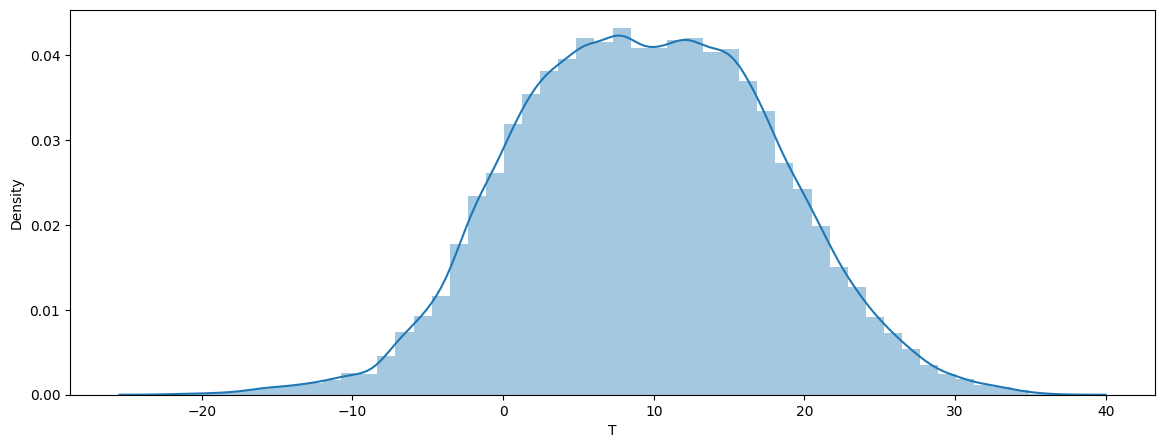

In [ ]:
#Check the data distribution
plt.figure(figsize = (14, 5))
sns.distplot(df_hour_lvl['T'])

In [ ]:
#ASSIGNMENT START
#ASSIGNMENT CELL: We want to perform EDA on this data before modelling it
df_hour_lvl.describe()
df_hour_lvl.isna().sum()

datetime    0
T           0
dtype: int64

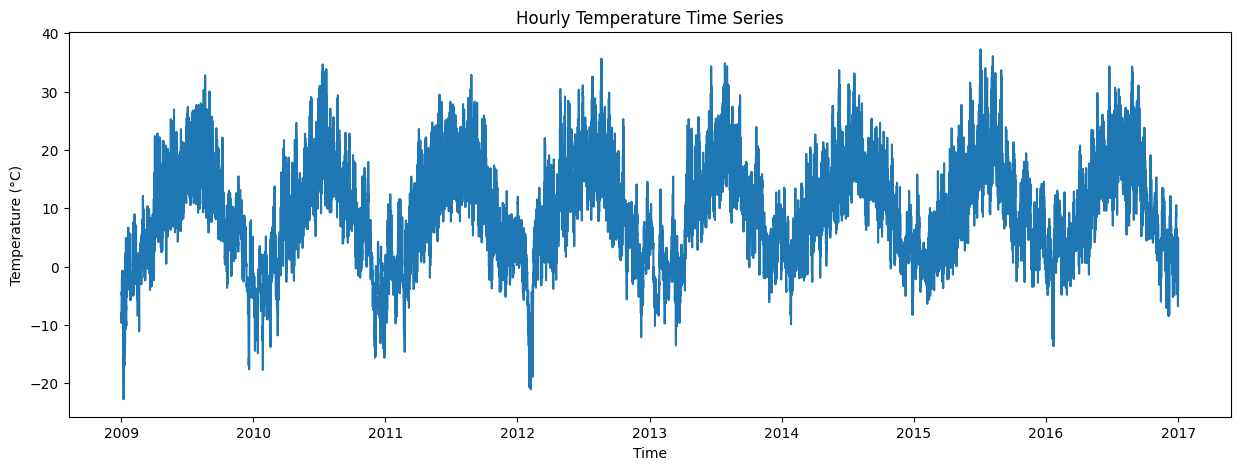

In [ ]:
#ASSIGNMENT CELL

#Time series overview
plt.figure(figsize=(15,5))
plt.plot(df_hour_lvl['datetime'], df_hour_lvl['T'])
plt.title('Hourly Temperature Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()

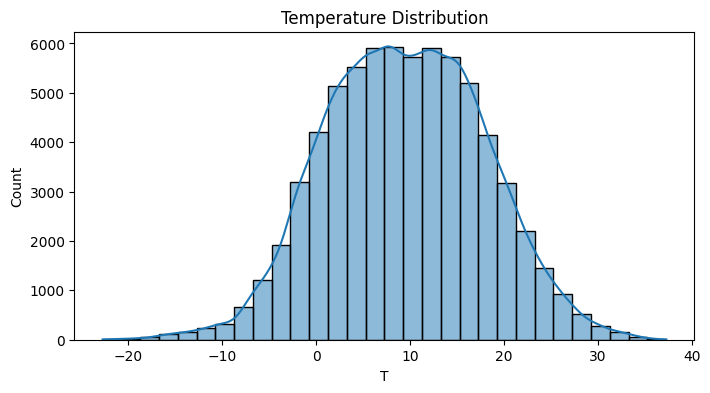

In [ ]:
#ASSIGNMENT CELL
#Checking the distribution
plt.figure(figsize=(8,4))
sns.histplot(df_hour_lvl['T'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.show()

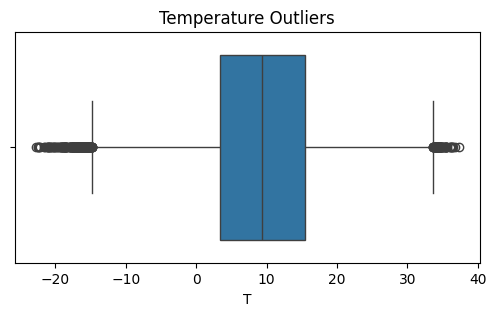

In [ ]:
#ASSIGNMENT CELL
#Creating a boxplot for outliers
plt.figure(figsize=(6,3))
sns.boxplot(x=df_hour_lvl['T'])
plt.title('Temperature Outliers')
plt.show()

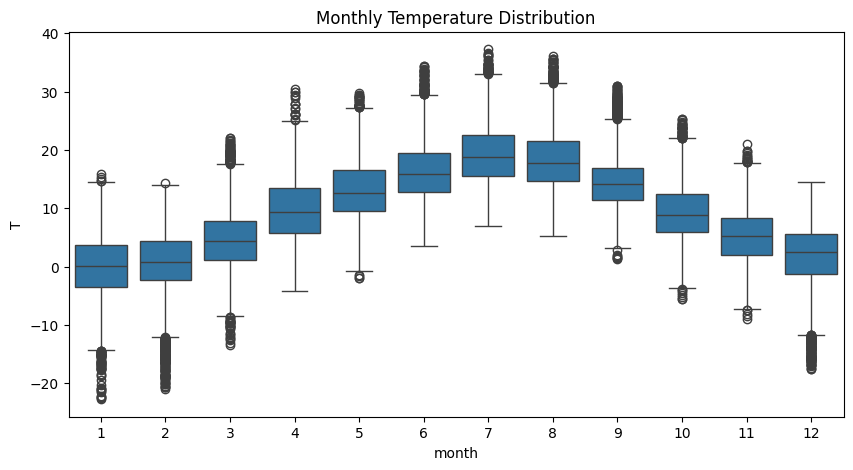

In [ ]:
#ASSIGNMENT CELL
#A seasonal pattern representation
df_hour_lvl['month'] = df_hour_lvl['datetime'].dt.month

plt.figure(figsize=(10,5))
sns.boxplot(x='month', y='T', data=df_hour_lvl)
plt.title('Monthly Temperature Distribution')
plt.show()

In [ ]:
#ASSIGNMENT CELL
#Although there appears to be a few outliers, since this is climate data i believe it would be the best to keep them, as they represent
#real physical events, and our LSTM will be able to learn from temporal context
#In a different situation however, we would want to use RobustScaler to deal with the outliers

In [ ]:
#ASSIGNMENT END

In [ ]:
#This data is a very good normal distrubtion. If the data was not, we would have to convert it into normal data using outlier remove or data transformation (eg Box-Cot Transformation) or bot
#LSTMs provide very bad forecast on skewed data

#Train test split
#We cannot simply provide a sequence of data points to an LSTM model for training and testing
#The input X sequence must be a 2D array [no of records, n_input], while the input y sequence must be a 1D array

def Sequential_Input_LSTM(df, input_sequence):
  df_np = df.to_numpy()
  X = []
  y = []

  for i in range(len(df_np) - input_sequence):
    row = [a for a in df_np[i:i + input_sequence]]
    X.append(row)
    label = df_np[i + input_sequence]
    y.append(label)

  return np.array(X), np.array(y)

In [ ]:
n_input = 10  #number of historical inputs to be used for forecasting the future time series

df_min_model_data = df_hour_lvl['T']

X, y = Sequential_Input_LSTM(df_min_model_data, n_input)

In [ ]:
X.shape, y.shape

((70081, 10), (70081,))

In [ ]:
#Training data
X_train, y_train = X[:56000], y[:56000]

#Validation data
X_val, y_val = X[56000:66000], y[56000:66000]

#Test data
X_test, y_test = X[66000:], y[66000:]

In [ ]:
#I have decided to not perform the train_test_split to preserve the splits in the dataset I have done in the above cell

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape

((56000, 10), (56000,))

In [ ]:
X_val.shape, y_val.shape

((10000, 10), (10000,))

In [ ]:
X_test.shape, y_test.shape

((4081, 10), (4081,))

In [ ]:
#days

print(f'Temp : {df['T']}')
print()
print(f'Total days      : {len(df_hour_lvl)/24}')
print(f'Training days   : {len(X_train)/24}')
print(f'Validation days : {len(X_val)/24}')
print(f'Testing days    : {len(X_test)/24}')

Temp : 0        -8.02
1        -8.41
2        -8.51
3        -8.31
4        -8.27
          ... 
420546   -4.05
420547   -3.35
420548   -3.16
420549   -4.23
420550   -4.82
Name: T, Length: 420551, dtype: float64

Total days      : 2920.4583333333335
Training days   : 2333.3333333333335
Validation days : 416.6666666666667
Testing days    : 170.04166666666666


In [ ]:
#Creating the LSTM Model
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

#We are using 3 layers of LSTM (called stacked/deep LSTM) instead of 1 layer (simple LSTM) for better forecast
#Use return_sequences = True is uing multiple LSTM layers except in the last layer, otherwise we face a dimension mismatch error
#No of neurons in the last fense layer is the shape we want in our output. In case of time series, we need 1D output. Hence, no of neutons in last dense layer should be 1
#Using earlystopping saves us a lot of time, it stops the model training once it realizes that there will be no more decrease in loss in further epochs and training can now be stopped earlier than described epochs

In [ ]:
n_features = 1  #number of input variables usedd for forecast (here only 1: temperature)

model1 = Sequential()

model1.add(InputLayer((n_input, n_features)))
model1.add(LSTM(100, return_sequences = True))
model1.add(LSTM(100, return_sequences = True))
model1.add(LSTM(50))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,817 (593.04 KB)

 Trainable params: 151,817 (593.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

model1.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [ ]:
model1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 50, callbacks = [early_stop])

Epoch 1/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 75s 37ms/step - loss: 60.8986 - root_mean_squared_error: 7.6436 - val_loss: 9.2316 - val_root_mean_squared_error: 3.0384
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - loss: 3.5510 - root_mean_squared_error: 1.8727 - val_loss: 2.1560 - val_root_mean_squared_error: 1.4683
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - loss: 1.0705 - root_mean_squared_error: 1.0332 - val_loss: 1.0565 - val_root_mean_squared_error: 1.0279
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - loss: 0.7273 - root_mean_squared_error: 0.8526 - val_loss: 0.8109 - val_root_mean_squared_error: 0.9005
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 102s 36ms/step - loss: 0.6546 - root_mean_squared_error: 0.8090 - val_loss: 0.6792 - val_root_mean_squared_error: 0.8241
Epoch 6/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - loss: 0.6422 - root_mean_squared_error: 0.8013 - val_loss: 0.6681 - val_root_mean_squared_error: 0.8174
Epoch 7/50
1750/1750 ━━━━━

In [ ]:
losses_df1 = pd.DataFrame(model1.history.history)
losses_df1

loss  root_mean_squared_error  val_loss  val_root_mean_squared_error
0   32.240501                 5.678072  9.231599                     3.038355
1    2.513684                 1.585460  2.155967                     1.468321
2    0.940974                 0.970038  1.056491                     1.027857
3    0.707386                 0.841062  0.810919                     0.900510
4    0.650718                 0.806671  0.679168                     0.824117
5    0.631428                 0.794625  0.668114                     0.817382
6    0.621409                 0.788295  0.649086                     0.805659
7    0.616270                 0.785029  0.630537                     0.794063
8    0.611958                 0.782278  0.617895                     0.786063
9    0.608325                 0.779952  0.649677                     0.806025
10   0.604512                 0.777504  0.629653                     0.793507

<Axes: >

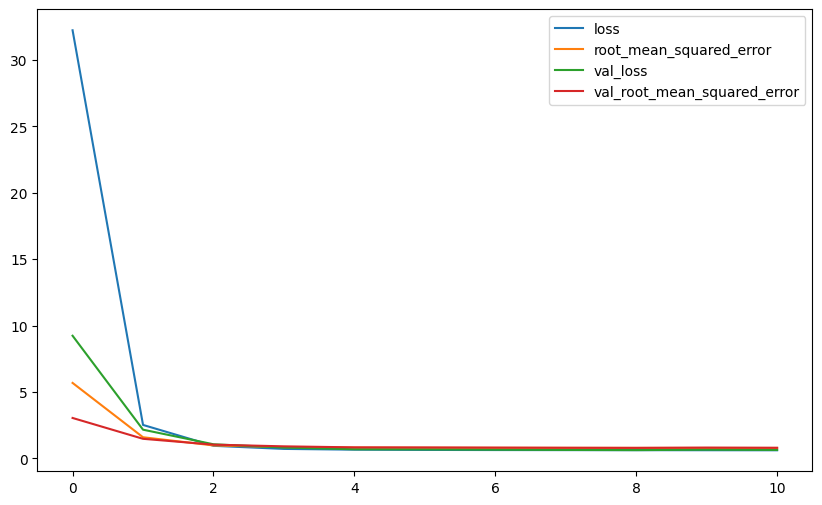

In [ ]:
losses_df1.plot(figsize = (10, 6))

In [ ]:
scores = model1.evaluate(X_test, y_test, verbose = 0)
print("%s: %.2f%%" % (model1.metrics_names[0], scores[0]*100))
print("%sL %.2f%%" % ('RootMeanSquaredError', scores[1]*100))

loss: 51.89%
RootMeanSquaredErrorL 72.03%


In [ ]:
#ASSIGNMENT START
#ASSIGNMENT CELL: now we want to visualise these LSTM scores

#Start with visualising training and validation loss

plt.figure(figsize=(12,6))
plt.plot(losses_df1['loss'], label='Training Loss')
plt.plot(losses_df1['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
#ASSIGNMENT CELL
#Visualise the RMSE
plt.figure(figsize=(12,6))
plt.plot(losses_df1['root_mean_squared_error'], label='Training RMSE')
plt.plot(losses_df1['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('LSTM Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
#ASSIGNMENT CELL
#Compare LSTM Predictions vs Actuals on the test set
y_pred = model1.predict(X_test)

plt.figure(figsize=(15,6))
plt.plot(y_test, label='Actual Temperature')
plt.plot(y_pred, label='Predicted Temperature')
plt.title('LSTM Predictions vs Actual Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [ ]:
#ASSIGNMENT END

In [ ]:
#Predict on test data
test_predictions1 = model1.predict(X_test).flatten()
test_predictions1

128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


array([22.719137 , 21.219183 , 20.380613 , ..., -1.8094594, -3.031113 ,
       -3.06285  ], dtype=float32)

In [ ]:
len(X_test), len(test_predictions1)

(4081, 4081)

In [ ]:
#Check the dimension of the output (should be 1 for time series forecast)
test_predictions1.ndim

1

In [ ]:
X_test_list = []
for i in range(len(X_test)):
  X_test_list.append(X_test[i][0])

len(X_test_list)

4081

In [ ]:
test_predictions_df1 = pd.DataFrame({'X_test':list(X_test_list), 'LSTM Prediction': list(test_predictions1)})
len(test_predictions_df1)

4081

In [ ]:
test_predictions_df1.head()

X_test  LSTM Prediction
0   28.50        22.719137
1   29.47        21.219183
2   29.83        20.380613
3   29.51        19.893143
4   29.15        19.575554

<Axes: >

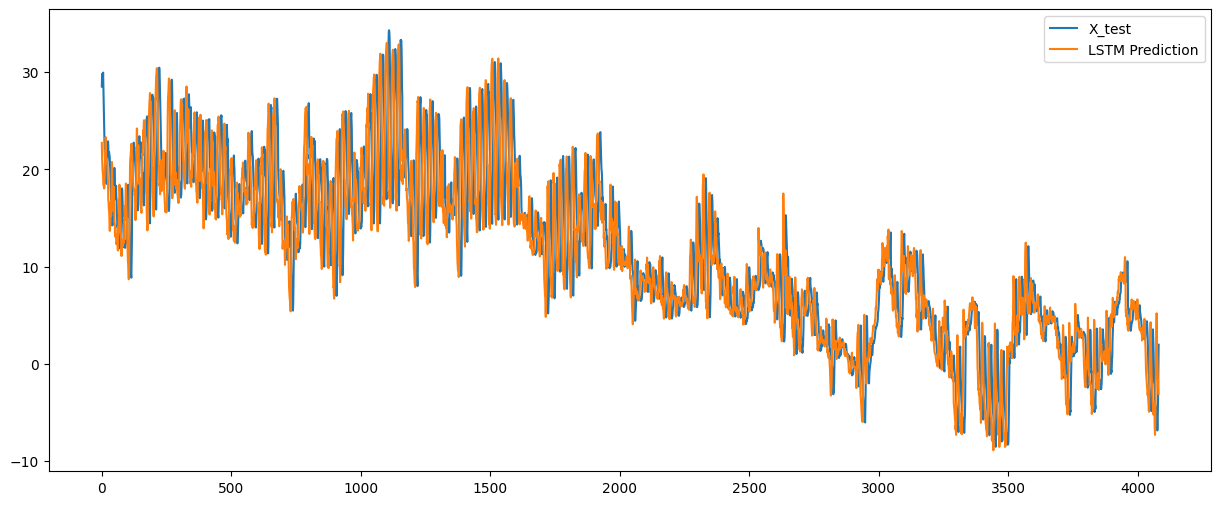

In [ ]:
#LSTM temperature forecast on complete test data
test_predictions_df1.plot(figsize = (15, 6))

In [ ]:
#Now moving on to NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [ ]:
df = pd.read_csv('twitter_training.csv')
df.head()

id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                       Tweet content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [ ]:
# Display dataset info
print("Dataset Shape:", df.shape)
print("\nMissing Values Before Cleaning:")
print(df.isna().sum())

Dataset Shape: (198, 4)

Missing Values Before Cleaning:
id               0
entity           0
sentiment        0
Tweet content    0
dtype: int64


In [ ]:
# Task 1: Data Cleaning and Preprocessing
def clean_text(text):
    if pd.isna(text):
        return ""
    try:
        text = str(text)
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove user mentions and hashtags
        text = re.sub(r'@\w+|#\w+', '', text)
        # Remove special characters except basic punctuation
        text = re.sub(r'[^\w\s]', ' ', text)
        # Convert to lowercase
        text = text.lower()
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text
    except Exception as e:
        print(f"Error cleaning text: {e}")
        return ""

In [ ]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    try:
        text = clean_text(text)
        if not text.strip():
            return ""
        # Tokenize and lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words and len(word) > 2]
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error preprocessing text: {e}")
        return ""

In [ ]:
# Apply preprocessing with progress feedback
print("\nPreprocessing text data...")
df['cleaned_text'] = df['Tweet content'].apply(preprocess_text)

# Handle missing values after cleaning
initial_count = len(df)
df = df[df['cleaned_text'].str.strip() != '']
df = df.dropna(subset=['sentiment'])
print(f"\nRemoved {initial_count - len(df)} rows with empty/missing data")


Preprocessing text data...

Removed 3 rows with empty/missing data


In [ ]:
# Task 2: Data Splitting
X = df['cleaned_text']
y = df['sentiment'].astype(str)  # Ensure sentiment is string type
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Task 3: Feature Extraction (TF-IDF)
print("\nCreating TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Include bigrams
    min_df=5,            # Ignore terms that appear in fewer than 5 documents
    max_df=0.7           # Ignore terms that appear in more than 70% of documents
)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


Creating TF-IDF features...


In [ ]:
# Task 4: Model Building (Multinomial Naive Bayes)
print("\nTraining model...")
nb_classifier = MultinomialNB(alpha=0.1)  # Add smoothing
nb_classifier.fit(X_train_tfidf, y_train)


Training model...


MultinomialNB(alpha=0.1)

In [ ]:
# Task 5: Model Evaluation
y_pred = nb_classifier.predict(X_test_tfidf)

print("\nModel Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.897

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.69      0.82        13
    Positive       0.87      1.00      0.93        26

    accuracy                           0.90        39
   macro avg       0.93      0.85      0.87        39
weighted avg       0.91      0.90      0.89        39


Confusion Matrix:
[[ 9  4]
 [ 0 26]]


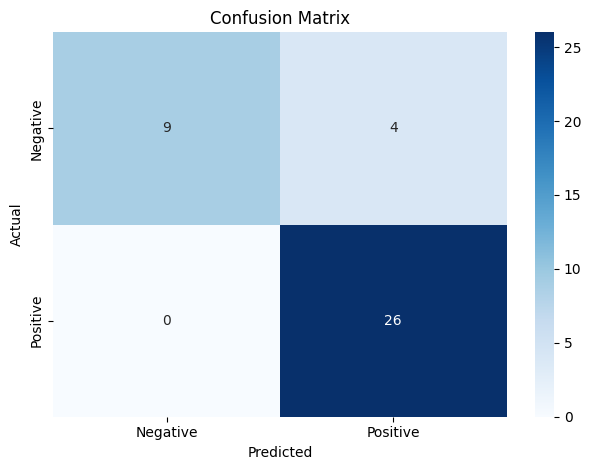

In [ ]:
# Confusion matrix heatmap
plt.plot(1, 2, 2)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_classifier.classes_,
            yticklabels=nb_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

([0, 1], [Text(0, 0, 'Positive'), Text(1, 0, 'Negative')])

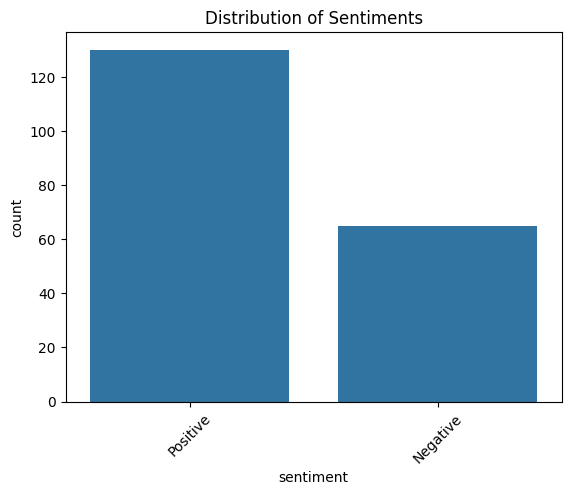

In [ ]:
# Sentiment distribution
plt.plot(1, 2, 1)
sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index)
plt.title('Distribution of Sentiments')
plt.xticks(rotation=45)

In [ ]:
# Task 6: Prediction with error handling
sample_tweets = [
    "I will finish Borderlands 2 today. I have some new commands set up and am looking forward to a good stream! Start in about an hour!",
    "Now how do I submit any complaint? Your CEO isn't offering his staff their bonuses.",
    "All the Borderlands are damn rubbish"
]

print("\nSample Predictions:")
for tweet in sample_tweets:
    try:
        cleaned = preprocess_text(tweet)
        if not cleaned.strip():
            print(f"Could not process tweet: '{tweet}'")
            continue
        vec = tfidf_vectorizer.transform([cleaned])
        pred = nb_classifier.predict(vec)[0]
        proba = nb_classifier.predict_proba(vec).max()
        print(f"'{tweet[:50]}...' -> {pred} (confidence: {proba:.2f})")
    except Exception as e:
        print(f"Error predicting for tweet: {e}")


Sample Predictions:
'I will finish Borderlands 2 today. I have some new...' -> Positive (confidence: 1.00)
'Now how do I submit any complaint? Your CEO isn't ...' -> Negative (confidence: 1.00)
'All the Borderlands are damn rubbish...' -> Positive (confidence: 0.62)


In [ ]:
"""
Note on Transformers:
The extensive preprocessing done here (cleaning, lemmatization, TF-IDF) is necessary for
traditional ML models like Naive Bayes. When using transformer models (BERT, etc.), most
preprocessing is handled automatically by their tokenizers, which:
1. Preserve context and word relationships
2. Handle subword tokenization
3. Include built-in cleaning of special characters
4. Maintain case information when beneficial
However, transformers require more computational resources and different feature extraction approaches.
"""

'\nNote on Transformers:\nThe extensive preprocessing done here (cleaning, lemmatization, TF-IDF) is necessary for \ntraditional ML models like Naive Bayes. When using transformer models (BERT, etc.), most \npreprocessing is handled automatically by their tokenizers, which:\n1. Preserve context and word relationships\n2. Handle subword tokenization\n3. Include built-in cleaning of special characters\n4. Maintain case information when beneficial\nHowever, transformers require more computational resources and different feature extraction approaches.\n'

In [ ]:
#!pip install transformers tf-keras
# import required libraries
from transformers import pipeline, DistilBertTokenizer, DistilBertForSequenceClassification

In [ ]:
# create pipeline for sentiment analysis
classification = pipeline('sentiment-analysis')
type(classification)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


transformers.pipelines.text_classification.TextClassificationPipeline

In [ ]:
# read data into DataFrame
df = pd.read_csv("twitter_training.csv")
# set the columns
df.columns = ['id','entity','sentiment','Tweet content']
# drop null values
df = df.dropna()
# print first 5 rows
df.head()

id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                       Tweet content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [ ]:
# select only required columns
df = df[['sentiment','Tweet content']]

<Axes: >

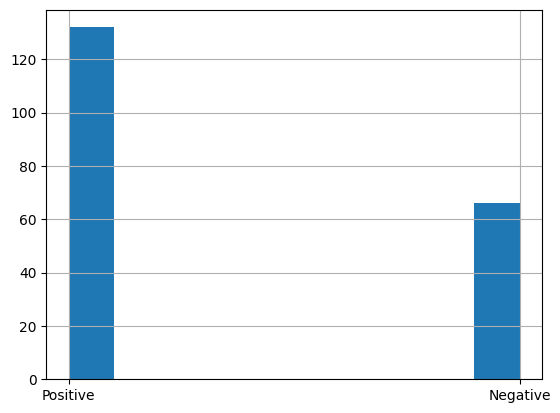

In [ ]:
# Let’s check the number of classes available in dataset and their distribution using histogram.

df['sentiment'].hist()

In [ ]:
target_map = { 'Positive': 1, 'Negative': 0}
df['target'] = df['sentiment'].map(target_map)

In [ ]:
texts = df['Tweet content'].to_list()

In [ ]:
import torch
torch.cuda.is_available()

predictions = classification(texts)

In [ ]:
predictions[:10]

[{'label': 'NEGATIVE', 'score': 0.9834704995155334},
 {'label': 'POSITIVE', 'score': 0.9932871460914612},
 {'label': 'POSITIVE', 'score': 0.978373646736145},
 {'label': 'NEGATIVE', 'score': 0.9768756628036499},
 {'label': 'POSITIVE', 'score': 0.701888382434845},
 {'label': 'NEGATIVE', 'score': 0.9805620312690735},
 {'label': 'NEGATIVE', 'score': 0.7845341563224792},
 {'label': 'NEGATIVE', 'score': 0.9357828497886658},
 {'label': 'POSITIVE', 'score': 0.9987744688987732},
 {'label': 'NEGATIVE', 'score': 0.937289834022522}]

In [ ]:
probs = [d['score'] if d['label'].startswith('P') else 1 - d['score'] for d in predictions ]

In [ ]:
# print few probabilities
probs[:10]

[0.016529500484466553,
 0.9932871460914612,
 0.978373646736145,
 0.023124337196350098,
 0.701888382434845,
 0.019437968730926514,
 0.21546584367752075,
 0.06421715021133423,
 0.9987744688987732,
 0.06271016597747803]

In [ ]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]

In [ ]:
# convert into numpy array
preds = np.array(preds)
print("acc:", np.mean(df['target'] == preds))

acc: 0.803030303030303


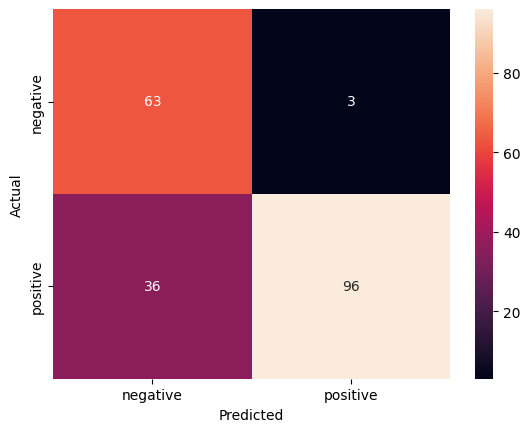

In [ ]:
# calculate confusion matrix
cm = confusion_matrix(df['target'], preds)
# create function for plotting confusion matrix
def plot_cm(cm):
  classes = ['negative','positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot = True, fmt='g')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

plot_cm(cm)

In [ ]:
#ASSIGNMENT START
#ASSIGNMENT CELL
#First I will do topic modelling using transitional NLP
!pip install gensim pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.8 MB/s eta 0:00:00


In [ ]:
#ASSIGNMENT CELL
#This will provide a topic and an interactive visualization of word importance per topic
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models

# Preprocessing for topic modeling (LDA prefers tokenized lists)
tokenized_texts = [preprocess_text(doc).split() for doc in df['Tweet content']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Train LDA model
lda_model = gensim.models.LdaModel(
    corpus,
    num_topics=3,        # Choose number of topics
    id2word=dictionary,
    passes=10,
    random_state=42
)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}:", topic)

# Visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

Topic 0: 0.058*"borderland" + 0.027*"really" + 0.024*"good" + 0.022*"drop" + 0.017*"game" + 0.016*"get" + 0.013*"got" + 0.012*"forward" + 0.012*"kill" + 0.011*"finally"
Topic 1: 0.042*"borderland" + 0.030*"stream" + 0.019*"fun" + 0.018*"make" + 0.014*"closer" + 0.013*"playing" + 0.013*"one" + 0.011*"bitch" + 0.011*"see" + 0.011*"come"
Topic 2: 0.057*"borderland" + 0.028*"fuck" + 0.025*"end" + 0.023*"fun" + 0.018*"probably" + 0.018*"play" + 0.015*"best" + 0.014*"year" + 0.012*"fire" + 0.012*"forever"


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.193176 -0.015479       1        1  45.645517
1      0.111502 -0.142634       2        1  36.230708
2      0.081674  0.158113       3        1  18.123775, topic_info=           Term       Freq       Total Category  logprob  loglift
59         fuck  15.000000   15.000000  Default  30.0000  30.0000
42       really  26.000000   26.000000  Default  29.0000  29.0000
358         end  14.000000   14.000000  Default  28.0000  28.0000
77       stream  27.000000   27.000000  Default  27.0000  27.0000
111        drop  21.000000   21.000000  Default  26.0000  26.0000
..          ...        ...         ...      ...      ...      ...
168        play   6.647202   10.773837   Topic3  -4.0423   1.2250
0    borderland  21.449611  108.444839   Topic3  -2.8708   0.0874
13          fun   8.749476   27.218754   Topic3  -3.7675   0.5730
296        best   5.563589   10.966250   Topic3  -4.2203   1.0294
25          pic   3.851514    7.788416   Topic3  -4.5880   1.0038

[156 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
35        1  0.618479    actually
35        3  0.309239    actually
55        3  0.968344         ago
178       1  0.940446      almost
382       1  0.841775      always
...     ...       ...         ...
327       3  0.902165    wavbacrj
318       1  0.431789        well
318       2  0.539736        well
61        3  0.847932        year
175       3  0.809063  yessssssss

[155 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
#ASSIGNMENT CELL
#Next I will do topic modelling using transformers

#!pip install bertopic sentence-transformers

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.7 MB/s eta 0:00:00


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replac

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
#ASSIGNMENT CELL
#This will capture semantic meanings in short texts
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Create embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(df['Tweet content'], show_progress_bar=True)

# Create BERTopic model
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df['Tweet content'], embeddings)

# View topics
topic_model.get_topic_info()

# Visualize topics
topic_model.visualize_topics()
topic_model.visualize_barchart(top_n_topics=5)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

README.md: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

vocab.txt: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

tokenizer.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future v

In [ ]:
#ASSIGNMENT CELL
fig1 = topic_model.visualize_topics()
fig1.show()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future v

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future v

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future v

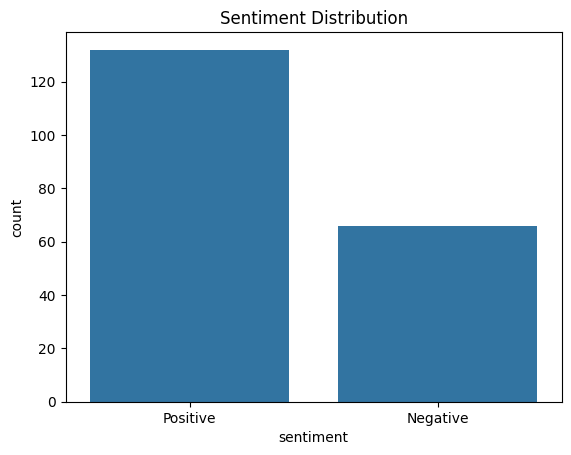

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future v

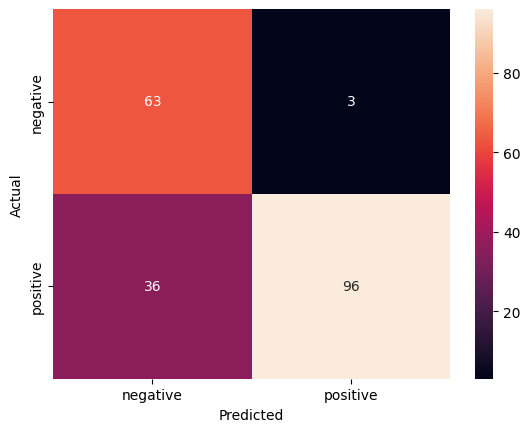

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future v

In [ ]:
#ASSIGNMENT CELL
# Plot sentiment distribution
sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.show()

# Confusion matrix heatmap
plot_cm(cm)

In [ ]:
#ASSIGNMENT END